In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 


In [2]:
 data = open('travel_blogs').read()

In [3]:
tokenizer = Tokenizer()


In [4]:

data = "We started off asking what started Ale Adventures and what gave them the idea to blog about beer and breweries.\
Based out of Minnesota, Adam and Katie have taken Ale Adventures to 7 overseas breweries, 7 breweries in North Dakota, 24 breweries in Wisconsin, 7 breweries in Illinois, and 98 breweries in Minnesota. \
With a scoreboard of that size, we were curious what their take was on different beers throughout the world. \
Since Adam & Katie are based out of Minnesota, we wanted to know more about the brewery scene there and what some of their favorite places are.\
We also had some suggestions of places and breweries we have been as well, and shared some of our favorite places. \
We also wanted to get to know more about the creators and co-writers of Ale Adventures, and how they met, so we asked more about where and how they met and how that led into a mutual appreciation and passion for beer. \
Since we’re a travel blog, we were interested what got them traveling more out of the country to visit breweries. \
So we asked if beer was the origin of these trips, or if they simply selected countries and found some breweries when they were there. \
We were also interested in their perspective of international vs. national beers and if they noticed any major difference between the two. We thought Ale Adventures was a great beer blog and now we can confirm it also has some great creators writers! Definitely make sure to check out Ale Adventures blog or Instagram for great beer content! Welcome back to the Friends That Carry On Podcast! We're a group of friends that like to travel the world together. \
We want to share our passion for travel through travel tips and tricks we've picked up along away and stories of our adventures! For Episode 14,  Tony Price is our host and tchotchke holder, and he’s joined this week alongside Eric Fargo and Jim Scott. \
This episode, the 3 Friends will be discussing different things to do in Madrid, breaking down the planning, where to stay, and everything in between. \
Hold on tight for another great episode! Our tchotchke this episode is this tiled bull, made up of tiles from Madrid, brought by Eric. As a group of friends, we have all been together in Pamplona , flying in and out of Madrid, so after having flown in and out of there, we made it a goal for us to go and spend more time in Madrid. \
So first, we talked about traveling out there and tips for getting there, as well as the places we stayed and tips for that. \
We like to share our experiences of traveling and where we stayed, to give some insight on things that worked and didn’t work for us, so we can hopefully help to influence how you might travel or where you might stay. \
We then led into some of the tours we’ve taken in Madrid, first being a Walking Tour, with Sandman Tours, and the second being a food tour, or the Tapas Tour. \
We’ve talked about tours in the past, including the Walking Tour in Madrid specifically, but we always recommend tours when visiting a place. \
If you take a tour of the area the first or second day, it’s a great way to learn the area a little bit and get comfortable with your surroundings."


print(data)


We started off asking what started Ale Adventures and what gave them the idea to blog about beer and breweries.Based out of Minnesota, Adam and Katie have taken Ale Adventures to 7 overseas breweries, 7 breweries in North Dakota, 24 breweries in Wisconsin, 7 breweries in Illinois, and 98 breweries in Minnesota. With a scoreboard of that size, we were curious what their take was on different beers throughout the world. Since Adam & Katie are based out of Minnesota, we wanted to know more about the brewery scene there and what some of their favorite places are.We also had some suggestions of places and breweries we have been as well, and shared some of our favorite places. We also wanted to get to know more about the creators and co-writers of Ale Adventures, and how they met, so we asked more about where and how they met and how that led into a mutual appreciation and passion for beer. Since we’re a travel blog, we were interested what got them traveling more out of the country to visit

In [4]:
# 
corpus = data.lower().split("\n")
print(corpus)

['if you are looking forward to a wide variety of landscapes and multiple choices of anchoring on a sailing holiday, then sail along the beautiful coastline of mallorca. the typical setting amidst the mallorcaâ€™s coastline means admiring the shallow turquoise waters against the theatrical mountains and dive into the sea whenever one wants. you can halt at those secluded beaches dotted with idyllic coves and dunes. you would just want the time to stand still and enjoy the glorious weather, the fantastic sea, and the excellent sailing trip.', 'the spanish islands of mallorca boast of a charming country lifestyle and are a realm of tradition and history. if you are toying with the idea of planning a sailing holiday with your family and friends around mallorca, well, you are in for a perfect holiday trip and memories of a lifetime. choose reputed sites like www.sailingholidays.com for that ideal vacation.', 'mallorca, also known as majorca, is the largest island in the balearic islands an

In [6]:
# 
tokenizer.fit_on_texts(corpus)

word_index = tokenizer.word_index
#
total_words = len(tokenizer.word_index) + 1

print("Dictionary of words\n")

print(tokenizer.word_index)

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print(reverse_word_index)

def decode_index(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



Dictionary of words

{'and': 1, 'the': 2, 'a': 3, 'of': 4, 'is': 5, 'sailing': 6, 'for': 7, 'to': 8, 'you': 9, 'mallorca': 10, 'are': 11, 'coast': 12, 'with': 13, 'charter': 14, 'can': 15, 'one': 16, 'in': 17, 'as': 18, 'that': 19, 'all': 20, 'yachts': 21, 'or': 22, 'on': 23, 'along': 24, 'those': 25, 'trip': 26, 'it': 27, 'yacht': 28, 'beaches': 29, 'like': 30, 'beach': 31, 'there': 32, 'be': 33, 'â€“': 34, 'popular': 35, 'bays': 36, 'if': 37, 'holiday': 38, 'sail': 39, 'coastline': 40, 'would': 41, 'enjoy': 42, 'islands': 43, 'island': 44, 'when': 45, 'an': 46, 'skipper': 47, 'motor': 48, 'itinerary': 49, 'east': 50, 'spots': 51, 'cala': 52, 'waters': 53, 'at': 54, 'coves': 55, 'your': 56, 'around': 57, 'perfect': 58, 'balearic': 59, 'across': 60, 'boasts': 61, 'spot': 62, 'before': 63, 'essential': 64, 'number': 65, 'will': 66, 'boats': 67, 'more': 68, 'most': 69, 'discover': 70, 'group': 71, 'include': 72, 'north': 73, 'rocky': 74, 'de': 75, 'looking': 76, 'wide': 77, 'choices': 78

In [7]:
# create input sequences using list of tokens
input_sequences = []

# For each sentence in corpus
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        # print array after converting them to sentences

print(input_sequences[0])
print(input_sequences[1])



print(decode_index(input_sequences[0]))
print(decode_index(input_sequences[1]))
print(decode_index(input_sequences[2]))




[37, 9]
[37, 9, 11]
if you
if you are
if you are looking


In [8]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])

print("Max seq lenth: ",  max_sequence_len)

# experiment with "post instead of pre"
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

print(len(input_sequences))
print(decode_index(input_sequences[0]))


# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

# Get this printed out to express lables with each sequences
label = ku.to_categorical(label, num_classes=total_words)
print(label)


Max seq lenth:  496
1056
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

In [9]:
# define all hyperparameters constants


model = Sequential()
# explain meaning of reach parameter and hyper parameters.
# create constants for hyperparameters instead of hard coding them
model.add(Embedding(total_words, 20, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(10, return_sequences = True)))
model.add(Bidirectional(LSTM(10, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(10))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


# save the model along with traning data in seperate files...
# When saving a model's weights, tf.keras defaults to the checkpoint format. Pass save_format='h5' to use HDF5.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 495, 20)           8520      
_________________________________________________________________
bidirectional (Bidirectional (None, 495, 20)           2480      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 495, 20)           2480      
_________________________________________________________________
dropout (Dropout)            (None, 495, 20)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dense (Dense)        

In [ ]:
# use callback functions to check the accuracy and save the model after attaining requisite accuracy and loss
history = model.fit(predictors, label, epochs=50, verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1056/1056 [==============================] - 56s 53ms/sample - loss: 6.1691 - acc: 0.0559
Epoch 2/50
1056/1056 [==============================] - 50s 47ms/sample - loss: 5.7386 - acc: 0.0616
Epoch 3/50
1056/1056 [==============================] - 47s 44ms/sample - loss: 5.4301 - acc: 0.0521
Epoch 4/50
1056/1056 [==============================] - 50s 47ms/sample - loss: 5.3859 - acc: 0.0616
Epoch 5/50
1056/1056 [==============================] - 48s 45ms/sample - loss: 5.3659 - acc: 0.0559
Epoch 6/50
1056/1056 [==============================] - 52s 49ms/sample - loss: 5.3518 - acc: 0.0616
Epoch 7/50
1056/1056 [==============================] - 50s 47ms/sample - loss: 5.3330 - acc: 0.0549
Epoch 8/50
1056/1056 [==============================] - 51s 49ms/sample - loss: 5.3096 - acc: 0.0606
Epoch 9/50
1056/1056 [==============================] - 52s 49ms/sample - loss: 5.2692 - acc: 0.0616
Epoch 10/50
1056/1056 [====================

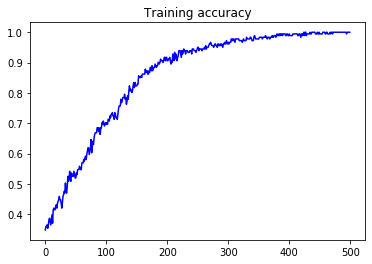

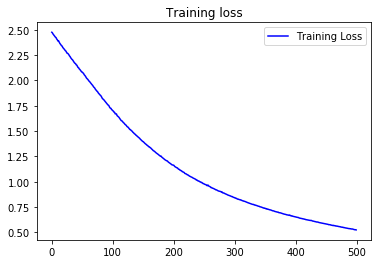

In [47]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [48]:
# generate random seed, so as to get new insights from the corpus with new stories....
seed_text = "Since Adam & Katie are"

# create random next_words to create new blogs
next_words = 100

# define function for following code and make it call for random seed sentences new stories
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)


Ale Adventures to 7 overseas breweries we idea to blog about beer and breweries based out of minnesota adam and katie have taken ale adventures
